In [9]:
from graph import Graph, cv2, plt

In [10]:
# Utilities Function
def load_image(path):
  """
	Load an image form a path.

  :param
		path: string, a path to the image to load
	
	:return
		img: np.array, an img with YUV color format
  """

  img = cv2.imread(path, cv2.IMREAD_COLOR) 			# in format BGR
  return cv2.cvtColor(img, cv2.COLOR_BGR2YUV)

def print_image(img, title=None):
	"""
	Show an image from a path.

	:param
		path: string, a path to the image to load
	"""
	
	img = cv2.cvtColor(img, cv2.COLOR_YUV2RGB)
	plt.figure(figsize=(10, 10))
	plt.imshow(img)
	plt.title(title)
	plt.axis("off")
	plt.show()

In [ ]:
# Global variable
graph_color = "green"
save_figure = False

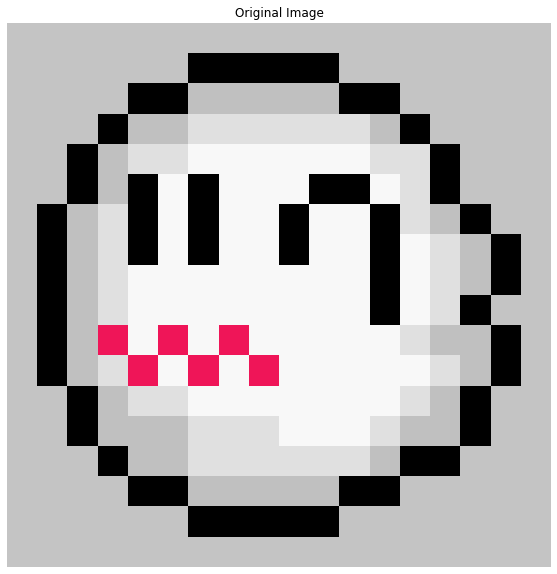

In [11]:
# Step 1 - Load a pixelart
img = load_image('data/boo.png') # CHANGE IMAGE PATH HERE
print_image(img, "Original Image")

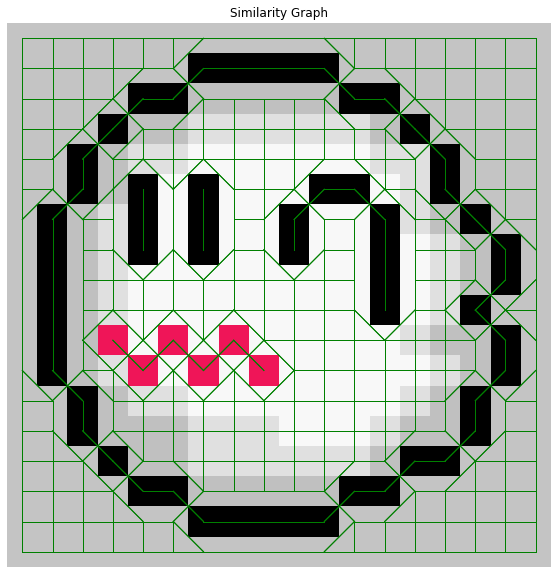

In [12]:
# Step 2 - Generate a graph from the image and keep only the similar connection between pixels
graph = Graph(img)
graph.keep_YUV_connection()
graph.remove_duplicate_connection()
graph.print("Similarity Graph", graph_color, saveFig=save_figure)

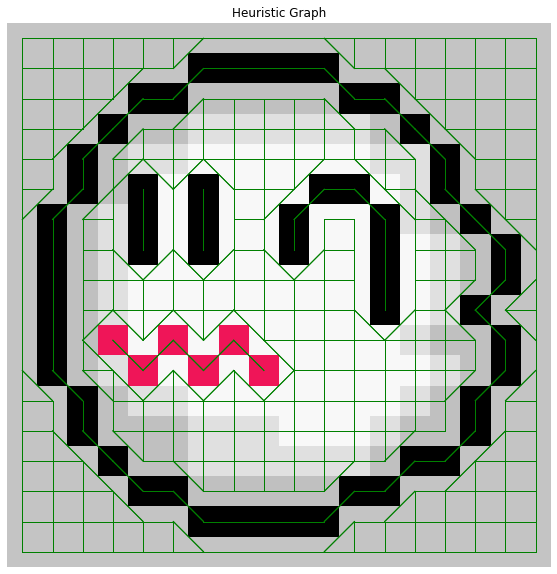

In [13]:
# Step 3 - Use heuristics to determined witch edges to keep in case of crossing edges
graph.apply_heuristics()
graph.print("Heuristic Graph", graph_color, saveFig=save_figure)

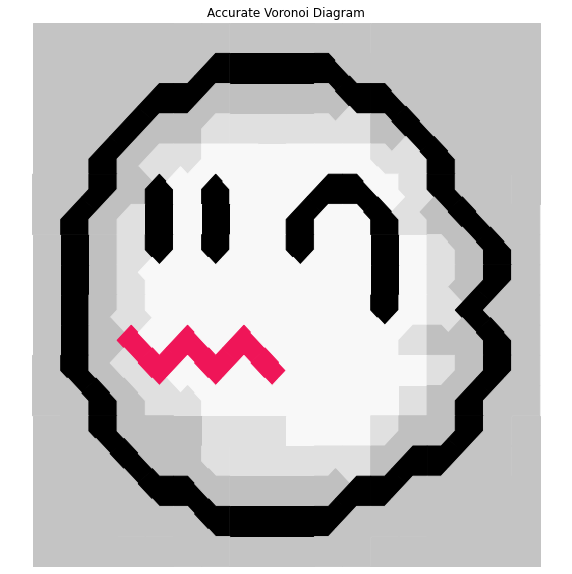

In [14]:
# Step 4 - Generate a Voronoi diagram with now deformed pixels based on their neighborhood
graph.YUV_to_RGB()
graph.generate_voronoi_corners()
graph.print_new_pixels_shape('Accurate Voronoi Diagram', showLine=True, saveFig=save_figure)

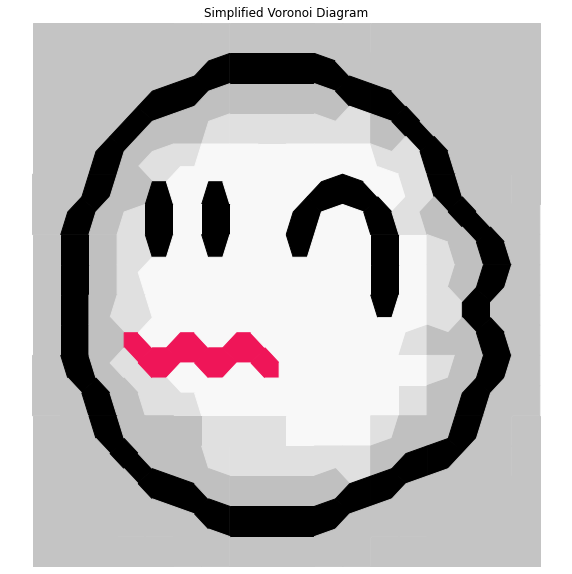

In [15]:
# Step 5 - Simplified the Voronoi diagram of the previous step by collapsing every 2 valence corners.
graph.collapse_valence2()
graph.print_new_pixels_shape('Simplified Voronoi Diagram', showLine=False, saveFig=save_figure)
graph.RGB_to_YUV()

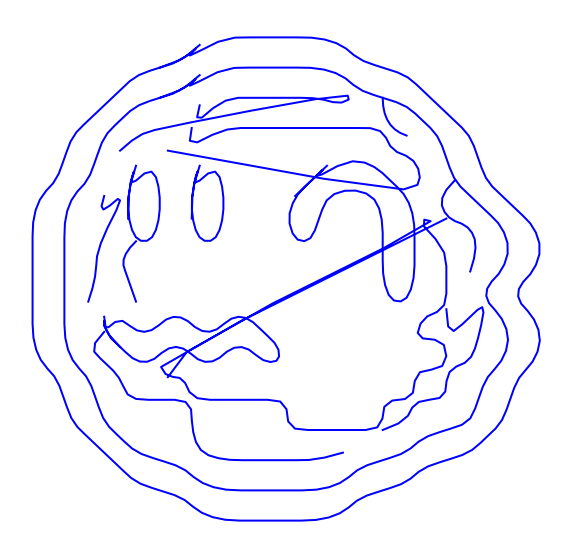

In [16]:
# Step 6 - Extraction of the B-splines who represent the outlines of regions with significant colors differences.
# Note : This step is unfinished.
graph.extract_splines()
graph.print_splines()